In [1]:
import pandas as pd
import numpy as np

In [2]:
from datetime import datetime

In [3]:
train=pd.read_csv('Time_series_data_train.csv')
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
test=pd.read_csv('Time_series_test.csv')
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [5]:
train_copy=train.copy()
test_copy=test.copy()

In [6]:
train_copy['Datetime']=pd.to_datetime(train_copy['Datetime'],format="%d-%m-%Y %H:%M")
train_copy.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [7]:
test_copy['Datetime']=pd.to_datetime(test_copy['Datetime'],format="%d-%m-%Y %H:%M")
test_copy.head()

,ID,Datetime
0,18288,2014-09-26 00:00:00
1,18289,2014-09-26 01:00:00
2,18290,2014-09-26 02:00:00
3,18291,2014-09-26 03:00:00
4,18292,2014-09-26 04:00:00


In [8]:
for i in (train_copy,test_copy):
    i['Year']=i.Datetime.dt.year
    i['Month']=i.Datetime.dt.month
    i['Day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour
train_copy.head()
    

,ID,Datetime,Count,Year,Month,Day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [9]:
train_copy['day_of_week']=train_copy['Datetime'].dt.dayofweek
train_copy.head()

,ID,Datetime,Count,Year,Month,Day,Hour,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [10]:
def applyfunc(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0
temp=train_copy['Datetime']

In [11]:
temp2=train_copy['Datetime'].apply(applyfunc)
train_copy['weekend']=temp2
train_copy.head()

,ID,Datetime,Count,Year,Month,Day,Hour,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


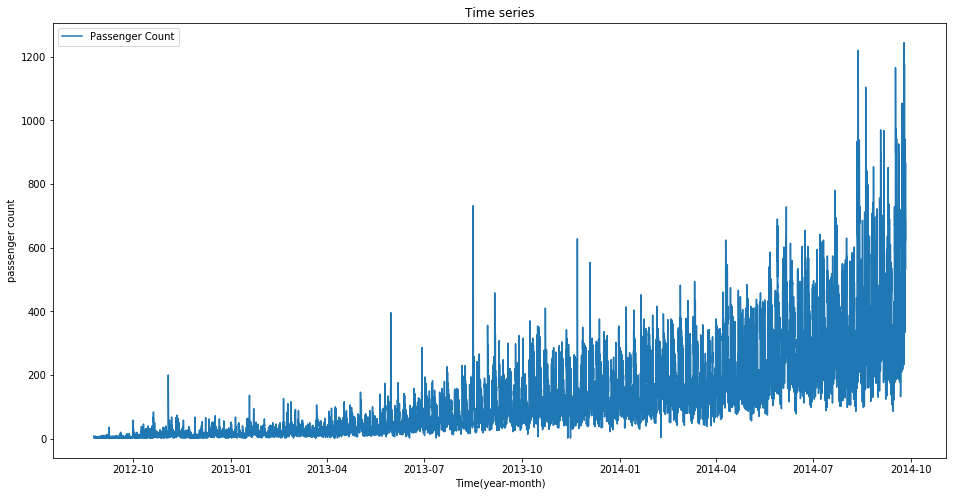

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
train_copy.index=train_copy['Datetime']
train_copy=train_copy.drop(columns=['ID'],axis=1)
count=train_copy['Count']
plt.figure(figsize=(16,8))
plt.plot(count,label='Passenger Count')
plt.title('Time series')
plt.xlabel('Time(year-month)')
plt.ylabel('passenger count')
plt.legend(loc='best')

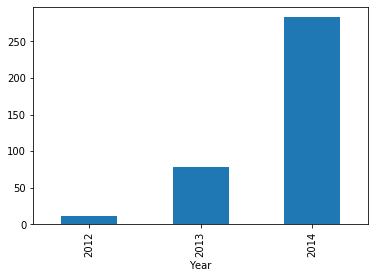

In [13]:
train_copy.groupby('Year')['Count'].mean().plot.bar()

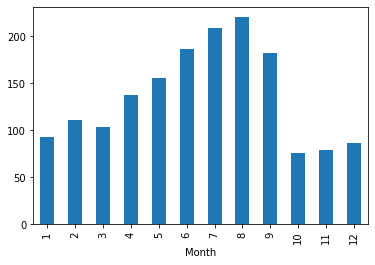

In [14]:
train_copy.groupby('Month')['Count'].mean().plot.bar()

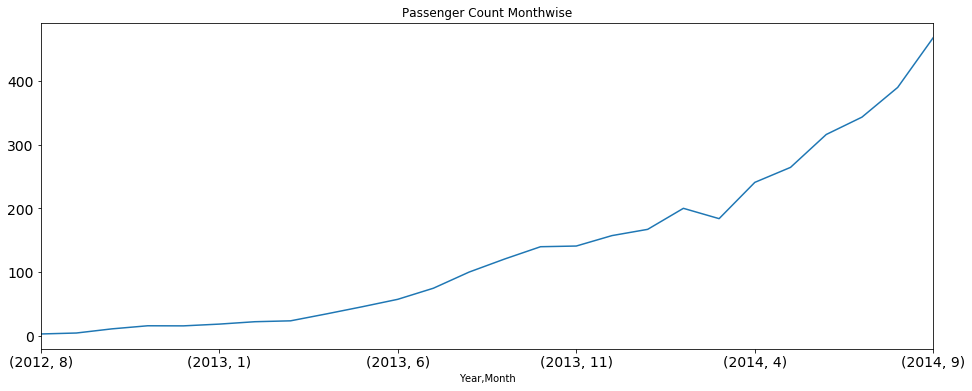

In [15]:
temp=train_copy.groupby(['Year','Month'])['Count'].mean()
temp.plot(figsize=(16,6),title='Passenger Count Monthwise',fontsize=14)

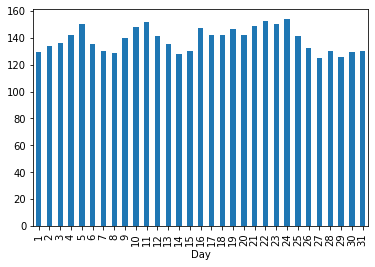

In [16]:
train_copy.groupby('Day')['Count'].mean().plot.bar()

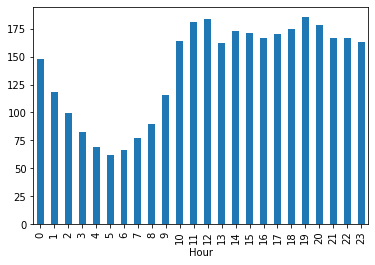

In [17]:
train_copy.groupby('Hour')['Count'].mean().plot.bar()

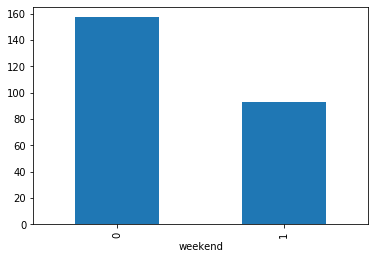

In [18]:
train_copy.groupby('weekend')['Count'].mean().plot.bar()

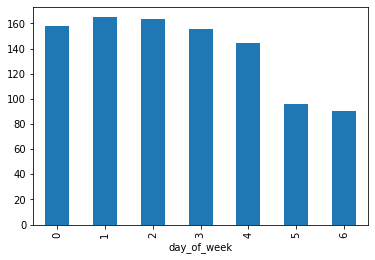

In [19]:
train_copy.groupby('day_of_week')['Count'].mean().plot.bar()

In [20]:
train['Timestamp']=pd.to_datetime(train['Datetime'],format="%d-%m-%Y %H:%M")
train.head()

,ID,Datetime,Count,Timestamp
0,0,25-08-2012 00:00,8,2012-08-25 00:00:00
1,1,25-08-2012 01:00,2,2012-08-25 01:00:00
2,2,25-08-2012 02:00,6,2012-08-25 02:00:00
3,3,25-08-2012 03:00,2,2012-08-25 03:00:00
4,4,25-08-2012 04:00,2,2012-08-25 04:00:00


In [21]:
train.index=train['Timestamp']
hourly=train.resample('H').mean()
hourly

,ID,Count
Timestamp,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2
2012-08-25 05:00:00,5,2
2012-08-25 06:00:00,6,2
2012-08-25 07:00:00,7,2
2012-08-25 08:00:00,8,6


In [22]:
train=train.resample('D').mean()

In [23]:
weekly=train.resample('W').mean()
monthly=train.resample('M').mean()

In [24]:
test['Timestamp']=pd.to_datetime(test['Datetime'],format="%d-%m-%Y %H:%M")
test.index=test['Timestamp']
test=test.resample('D').mean()

In [25]:
Train=train.ix['2012-08-25':'2014-06-24']
Test=test.ix['2014-06-25':'2014-09-25']

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [26]:
Test=train.loc['2014-06-25':'2014-09-25']

In [27]:
Train=Train.drop(columns=['ID'],axis=1)
Test=Test.drop(columns=['ID'],axis=1)

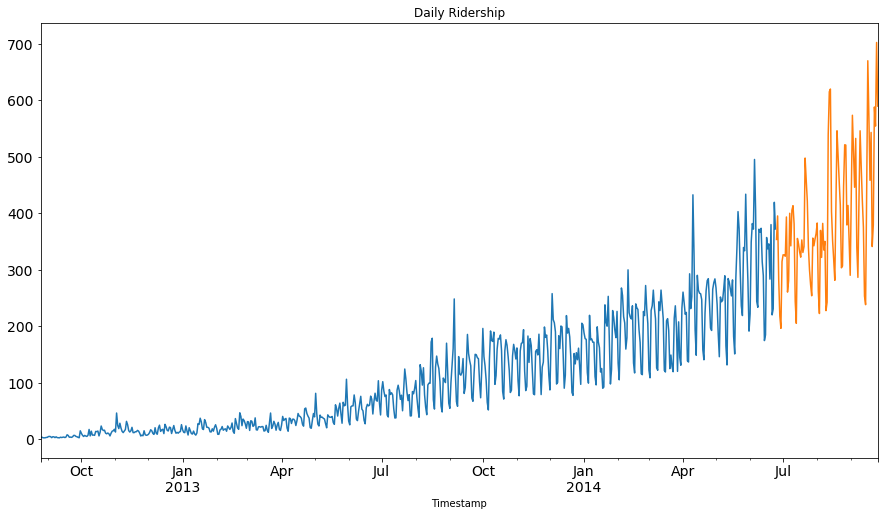

In [28]:
Train.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='train')
Test.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='test')

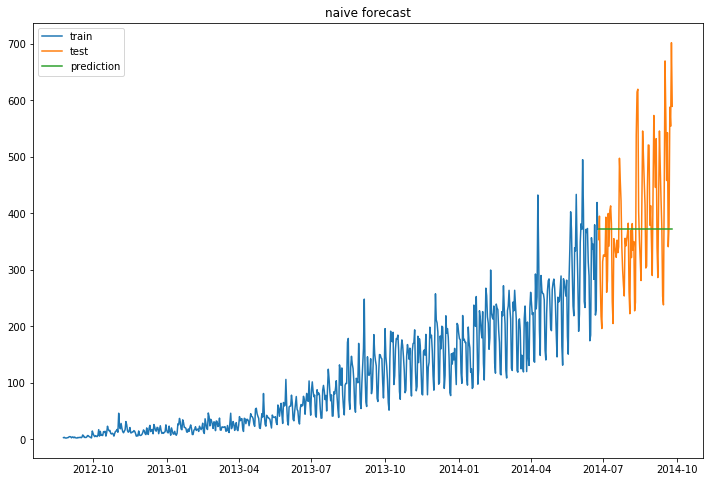

In [31]:
import numpy as np
dd=np.asarray(Train['Count'])
y_hat=Test.copy()
y_hat['naive']=dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train['Count'],label='train')
plt.plot(Test.index,Test['Count'],label='test')
plt.plot(y_hat.index,y_hat['naive'],label='prediction')
plt.legend(loc='best')
plt.title('naive forecast')
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(Test.Count,y_hat.naive))
rms

111.79050467496724

In [38]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
Train.columns

Index(['Count'], dtype='object')

In [39]:
model=SimpleExpSmoothing(Train['Count'].values)
model_fit=model.fit()
pred=model_fit.predict(len(Test))
rms=sqrt(mean_squared_error(Test['Count'],pred))

ValueError: Found input variables with inconsistent numbers of samples: [93, 576]